<a href="https://colab.research.google.com/github/HyeongJun02/BaekJoon/blob/main/%5BML%5D_%5B24_10_17%5D_7%EC%A3%BC%EC%B0%A8_2_Basecode_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Multi Layer Perceptron

## Import modules

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Load datasets

- kc_house_data: 미국 워싱턴주 시애틀(South King County)을 포함한 킹카운티(King County) 지역의 주택 가격 데이터를 포함한 공개 데이터셋
1. id: 각 주택 거래에 대한 고유 식별자.
2. date: 주택이 판매된 날짜.
3. price: 주택의 판매 가격 (종속 변수, 목표 값).
4. bedrooms: 침실의 개수.
5. bathrooms: 욕실의 개수 (부분 욕실도 포함).
6. sqft_living: 주택의 실내 면적 (평방 피트).
7. sqft_lot: 주택의 대지 면적 (평방 피트).
8. floors: 주택의 층수.
9. waterfront: 주택이 해안가에 위치해 있는지 여부 (1: 해안가, 0: 해안가 아님).
10. view: 주택에서의 전망의 질을 나타내는 지표 (0~4).
11. condition: 주택의 전반적인 상태 (1~5).
12. grade: 주택의 건축 품질과 디자인 등급 (1~13).
13. sqft_above: 지상 층의 면적 (평방 피트).
14. sqft_basement: 지하 층의 면적 (평방 피트).
15. yr_built: 주택이 지어진 연도.
16. yr_renovated: 주택이 개보수된 연도.
17. zipcode: 우편번호.
18. lat: 주택의 위도.
19. long: 주택의 경도.
20. sqft_living15: 2015년 기준으로, 인근 15개의 주택의 평균 실내 면적 (평방 피트).
21. sqft_lot15: 2015년 기준으로, 인근 15개의 주택의 평균 대지 면적 (평방 피트).

In [ ]:
# Dataset 다운로드
!wget "https://dongaackr-my.sharepoint.com/:x:/g/personal/sjkim_donga_ac_kr/ET2udlQfsxRAsvnlEtgzfi0B3HAMAmqP_Y2WRsbYrTvYaA?e=t6809f&download=1" -O kc_house_data.csv

--2024-10-18 10:38:55--  https://dongaackr-my.sharepoint.com/:x:/g/personal/sjkim_donga_ac_kr/ET2udlQfsxRAsvnlEtgzfi0B3HAMAmqP_Y2WRsbYrTvYaA?e=t6809f&download=1
Resolving dongaackr-my.sharepoint.com (dongaackr-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to dongaackr-my.sharepoint.com (dongaackr-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/sjkim_donga_ac_kr/Documents/%ea%b3%b5%ec%9c%a0%ec%9e%90%eb%a3%8c/kc_house_data.csv?ga=1 [following]
--2024-10-18 10:38:56--  https://dongaackr-my.sharepoint.com/personal/sjkim_donga_ac_kr/Documents/%ea%b3%b5%ec%9c%a0%ec%9e%90%eb%a3%8c/kc_house_data.csv?ga=1
Reusing existing connection to dongaackr-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 2381977 (2.3M) [application/octet-stream]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.27M  1.13MB/s    in 2.0s    

2024-10-1

In [ ]:
# Load dataset file
data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


## Dataset 전처리

In [ ]:
# 예측 수행에 불필요한 열 삭제
new_data = data.drop(['id', 'date'], axis=1)

# 값이 존재하지 않는 행 삭제
new_data = new_data.dropna()

# 데이터셋 가우시안 정규화
data_normalized = (new_data - new_data.mean()) / new_data.std()
data_normalized

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.866651,-0.398702,-1.447485,-0.979782,-0.228324,-0.915423,-0.087175,-0.305768,-0.629148,-0.558814,-0.734664,-0.658680,-0.545001,-0.210134,1.870068,-0.352504,-0.306085,-0.943309,-0.260719
1,-0.005679,-0.398702,0.175560,0.533683,-0.189891,0.936417,-0.087175,-0.305768,-0.629148,-0.558814,0.460803,0.245301,-0.681183,4.746338,0.879507,1.161554,-0.746328,-0.432671,-0.187876
2,-0.980776,-1.473865,-1.447485,-1.426199,-0.123308,-0.915423,-0.087175,-0.305768,-0.629148,-1.409515,-1.229757,-0.658680,-1.294004,-0.210134,-0.933406,1.283516,-0.135669,1.070065,-0.172385
3,0.174087,0.676461,1.149388,-0.130499,-0.244016,-0.915423,-0.087175,-0.305768,2.444206,-0.558814,-0.891645,1.397876,-0.204545,-0.210134,1.085095,-0.283224,-1.271779,-0.914130,-0.284524
4,-0.081944,-0.398702,-0.149049,-0.435370,-0.169660,-0.915423,-0.087175,-0.305768,-0.629148,0.291886,-0.130893,-0.658680,0.544459,-0.210134,-0.073674,0.409577,1.199262,-0.272184,-0.192857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.490504,-0.398702,0.500169,-0.598693,-0.337420,2.788257,-0.087175,-0.305768,-0.629148,0.291886,-0.312024,-0.658680,1.293462,-0.210134,0.468331,1.004952,-0.938047,-0.666105,-0.412374
21609,-0.381554,0.676461,0.500169,0.250589,-0.224389,0.936417,-0.087175,-0.305768,-0.629148,0.291886,0.629859,-0.658680,1.463690,-0.210134,1.271993,-0.356112,-1.051658,-0.228415,-0.203953
21610,-0.375832,-1.473865,-1.772095,-1.153993,-0.332133,0.936417,-0.087175,-0.305768,-0.629148,-0.558814,-0.927871,-0.658680,1.293462,-0.210134,1.234614,0.247923,-0.604314,-1.410178,-0.394136
21611,-0.381554,-0.398702,0.500169,-0.522476,-0.307074,0.936417,-0.087175,-0.305768,-0.629148,0.291886,-0.227496,-0.658680,1.123234,-0.210134,-0.952096,-0.184356,1.028845,-0.841181,-0.420504


## Dataset 특성 파악

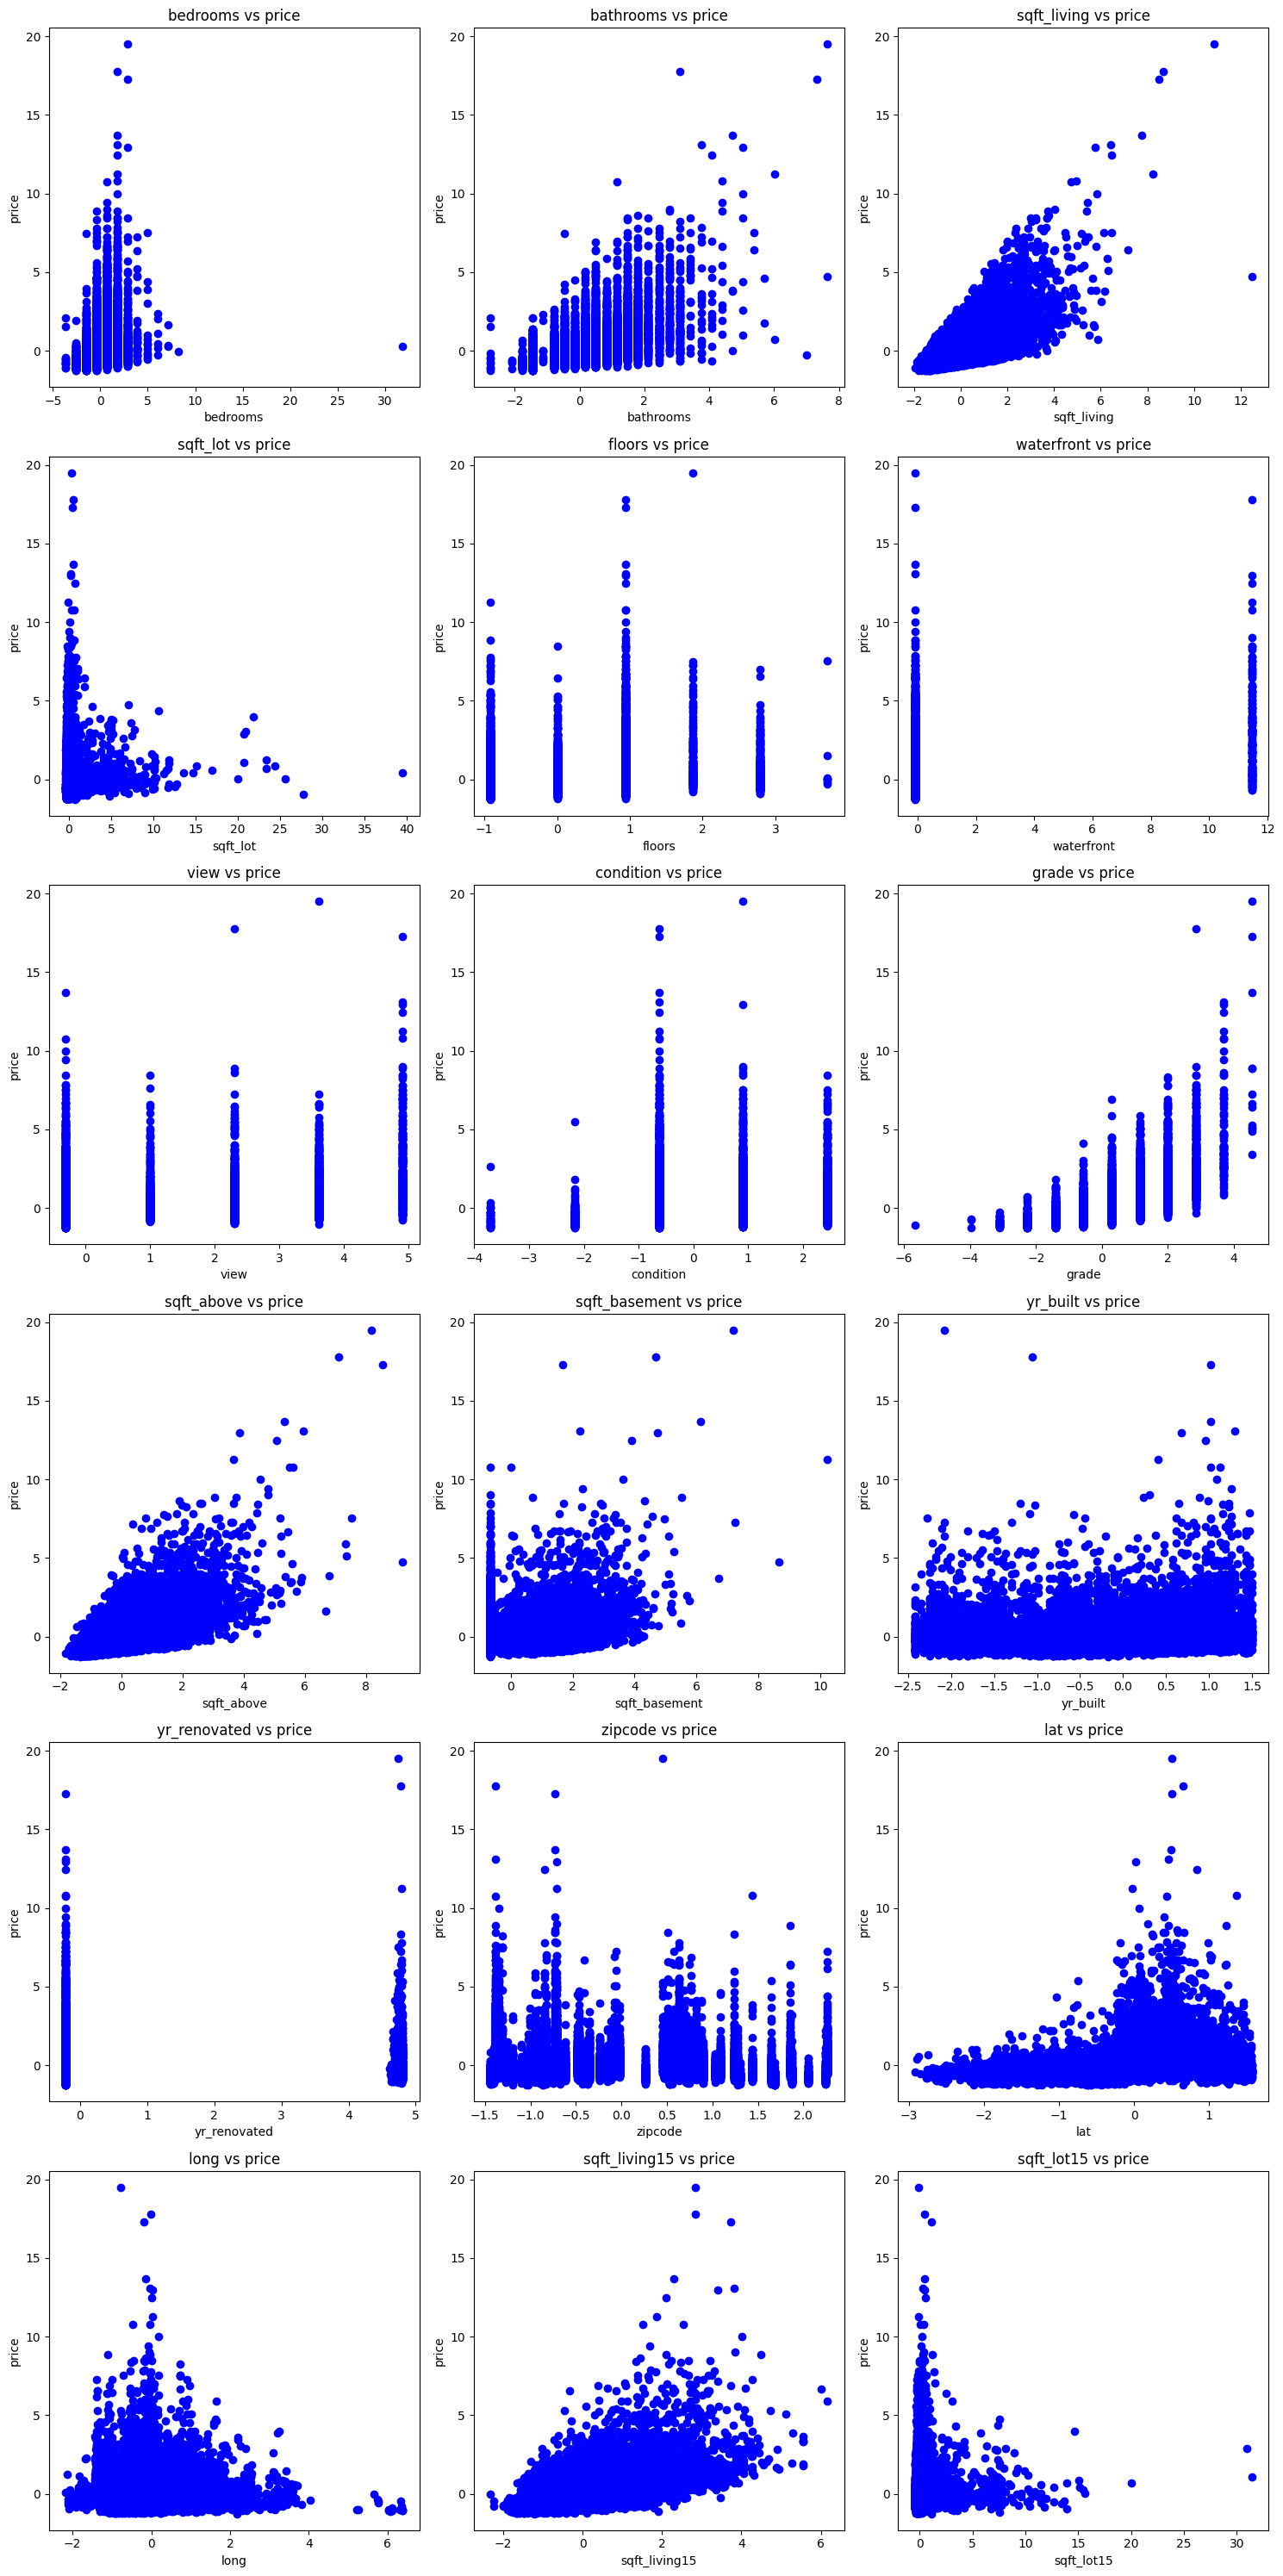

In [ ]:
# 각 데이터에 대한 시각화
fixed_column = 'price'
used_columns = data_normalized.columns.drop(fixed_column)

num_vars = len(used_columns)
rows = (num_vars + 2) // 3  # 3열 기준으로 필요한 행 계산

fig, axs = plt.subplots(rows, 3, figsize=(15, rows * 5))

# 각 열에 대해 scatter plot을 생성하는 반복문
for i, used_column in enumerate(used_columns):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(data_normalized[used_column], data_normalized[fixed_column], color='blue')
    axs[row, col].set_title(f'{used_column} vs {fixed_column}')
    axs[row, col].set_xlabel(used_column)
    axs[row, col].set_ylabel(fixed_column)

# 남은 빈 subplot 제거
for i in range(num_vars, rows * 3):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

In [ ]:
# 데이터의 각 열에 대한 상관관계 확인
correlation_matrix = data_normalized.corr()
correlation_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308366,0.525150,0.702055,0.089661,0.256814,0.266371,0.397299,0.036379,0.667434,0.605567,0.323842,0.054006,0.126436,-0.053182,0.307010,0.021613,0.585377,0.082448
bedrooms,0.308366,1.000000,0.515974,0.576763,0.031710,0.175418,-0.006581,0.079537,0.028433,0.356998,0.477616,0.303251,0.154248,0.018844,-0.152717,-0.008950,0.129516,0.391670,0.029252
bathrooms,0.525150,0.515974,1.000000,0.754684,0.087730,0.500712,0.063743,0.187735,-0.124917,0.664981,0.685363,0.283737,0.505968,0.050733,-0.203825,0.024619,0.222987,0.568626,0.087163
sqft_living,0.702055,0.576763,0.754684,1.000000,0.172841,0.354048,0.103829,0.284647,-0.058689,0.762727,0.876644,0.434925,0.318066,0.055377,-0.199342,0.052530,0.240187,0.756440,0.183301
sqft_lot,0.089661,0.031710,0.087730,0.172841,1.000000,-0.005206,0.021602,0.074705,-0.008951,0.113617,0.183511,0.015301,0.053061,0.007640,-0.129583,-0.085673,0.229519,0.144605,0.718556
floors,0.256814,0.175418,0.500712,0.354048,-0.005206,1.000000,0.023695,0.029432,-0.263808,0.458208,0.523899,-0.245634,0.489361,0.006330,-0.059181,0.049628,0.125446,0.279907,-0.011275
waterfront,0.266371,-0.006581,0.063743,0.103829,0.021602,0.023695,1.000000,0.401857,0.016655,0.082775,0.072074,0.080618,-0.026172,0.092883,0.030283,-0.014270,-0.041913,0.086463,0.030702
view,0.397299,0.079537,0.187735,0.284647,0.074705,0.029432,0.401857,1.000000,0.045995,0.251320,0.167648,0.277051,-0.053474,0.103912,0.084819,0.006172,-0.078408,0.280440,0.072569
condition,0.036379,0.028433,-0.124917,-0.058689,-0.008951,-0.263808,0.016655,0.045995,1.000000,-0.144647,-0.158206,0.174273,-0.361384,-0.060617,0.002967,-0.014965,-0.106453,-0.092795,-0.003397
grade,0.667434,0.356998,0.664981,0.762727,0.113617,0.458208,0.082775,0.251320,-0.144647,1.000000,0.755924,0.168375,0.446958,0.014412,-0.184842,0.114102,0.198349,0.713197,0.119243


## 집 가격 예측에 사용할 데이터 지정


In [ ]:
# 예측에 사용할 데이터들에 대한 2차원 행렬 변환
x = np.array(data_normalized[['sqft_living', 'waterfront', 'grade', 'yr_built', 'lat', 'long']])
y = np.array(data_normalized[['price']])

# Train dataset / Test dataset 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

# Train dataset 형상 확인
print(x_train.shape)
print(y_train.shape)

(17288, 6)
(17288, 1)


## Single Layer Perceptron
## Multi Layer Perceptron

In [ ]:
'''
class SLP(nn.Module):
  def __init__(self):
    super(SLP, self).__init__()

    self.fc1 = nn.Linear(1, 1, bias=True)

  def forward(self, x):
    y = self.fc1(x)

    return y
'''
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()

    self.fc1 = nn.Linear(6, 36, bias=True)
    self.fc2 = nn.Linear(36, 72, bias=True)
    self.fc3 = nn.Linear(72, 1, bias=True)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    y = self.sigmoid(self.fc1(x))
    y = self.sigmoid(self.fc2(y))
    y = self.fc3(y)

    return y

## Hyper-parameters 지정

In [ ]:
batch_size = 100
learning_rate = 0.01
training_epochs = 100
loss_function = nn.MSELoss()
network = MLP()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

## Perceptron 학습을 위한 반복문 선언

In [ ]:
network.train()

for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(x_train) // batch_size

  for batch in range(total_batch):
    input = torch.tensor(x_train[batch * batch_size : (batch * batch_size) + batch_size, :], dtype=torch.float32)
    label = torch.tensor(y_train[batch * batch_size : (batch * batch_size) + batch_size, :], dtype=torch.float32)

    pred = network(input)

    loss = loss_function(pred, label)
    optimizer.zero_grad() # gradient 초기화
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch+1, avg_cost))

print('Learning finished')

Epoch: 1 Loss = 0.992727
Epoch: 2 Loss = 0.951504
Epoch: 3 Loss = 0.893659
Epoch: 4 Loss = 0.804104
Epoch: 5 Loss = 0.676787
Epoch: 6 Loss = 0.543256
Epoch: 7 Loss = 0.457020
Epoch: 8 Loss = 0.420688
Epoch: 9 Loss = 0.405163
Epoch: 10 Loss = 0.395524
Epoch: 11 Loss = 0.388042
Epoch: 12 Loss = 0.381819
Epoch: 13 Loss = 0.376481
Epoch: 14 Loss = 0.371787
Epoch: 15 Loss = 0.367567
Epoch: 16 Loss = 0.363701
Epoch: 17 Loss = 0.360107
Epoch: 18 Loss = 0.356728
Epoch: 19 Loss = 0.353525
Epoch: 20 Loss = 0.350475
Epoch: 21 Loss = 0.347558
Epoch: 22 Loss = 0.344762
Epoch: 23 Loss = 0.342078
Epoch: 24 Loss = 0.339496
Epoch: 25 Loss = 0.337009
Epoch: 26 Loss = 0.334609
Epoch: 27 Loss = 0.332291
Epoch: 28 Loss = 0.330048
Epoch: 29 Loss = 0.327874
Epoch: 30 Loss = 0.325763
Epoch: 31 Loss = 0.323711
Epoch: 32 Loss = 0.321714
Epoch: 33 Loss = 0.319766
Epoch: 34 Loss = 0.317863
Epoch: 35 Loss = 0.316002
Epoch: 36 Loss = 0.314179
Epoch: 37 Loss = 0.312392
Epoch: 38 Loss = 0.310639
Epoch: 39 Loss = 0.30

In [ ]:
for param in network.parameters():
    print(param)

Parameter containing:
tensor([[-0.2848,  0.0634, -0.1310,  0.0350, -0.0640, -0.2418],
        [-0.2129,  0.0374, -0.2840, -0.2863,  0.1409, -0.5045],
        [ 0.0834,  0.0090,  0.3071, -0.2442,  0.2473,  0.4381],
        [ 0.2956,  0.0654,  0.1045, -0.2354,  0.0658, -0.5061],
        [-0.0432, -0.3739, -0.4587,  0.2186,  0.1828,  0.2441],
        [ 0.1548, -0.0139,  0.3683, -0.2714,  0.3454, -0.3631],
        [-0.2468, -0.0181, -0.3677,  0.0651,  0.4806,  0.4373],
        [ 0.1471, -0.4058,  0.3545, -0.0082,  0.3116,  0.1152],
        [-0.0721, -0.3374, -0.0693,  0.1157, -0.6204,  0.6028],
        [ 0.2986, -0.4310,  0.2722, -0.0324, -0.1694,  0.1990],
        [-0.0138, -0.0306, -0.5234,  0.0563, -0.1146,  0.3689],
        [-0.0954,  0.0248, -0.2974, -0.0783,  0.1371, -0.3316],
        [-0.0556,  0.2531,  0.3371, -0.1599,  0.2625, -0.0972],
        [-0.0592,  0.0825,  0.2720,  0.3714,  0.3564,  0.4755],
        [-0.1087,  0.2467,  0.0903, -0.3798, -0.1698, -0.1762],
        [-0.2338, 

## Prediction

In [ ]:
# Test dataset을 이용한 예측
input = torch.tensor(x_test, dtype=torch.float32)
network.eval()
with torch.no_grad(): # test에서는 기울기 계산 제외
    y_hat = network(input)
y_hat = y_hat.detach().numpy()

In [ ]:
# 정답 데이터와 예측 데이터 간 차이 계산
def MSE (pred, label):
  error = pred - label
  mse = np.mean(error ** 2)
  return mse

print(MSE(y_hat, y_test))

0.2716311265543761


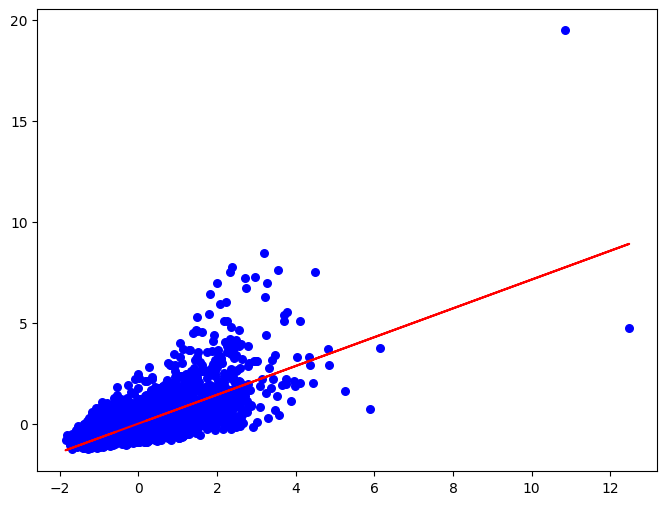

In [ ]:
# 시각화
fig = plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='b', marker='o', s=30)
plt.plot(x_test, y_hat, color='r')
plt.show()